In [126]:
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/mySO_src/libs/')
import matplotlib as mpl
# mpl.use('agg')
from myPlot import  figmaster,myClrbr
from myTools import myInfo
import matplotlib.path as mpath
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import gsw.density as gsw_d
import gsw.conversions as gsw_c
from eofs.xarray import Eof
import numpy as np
import xarray as xr
import pickle
from myTrend import myfitting2d_sttcs,myfitting1d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata 
import warnings
import colormaps as cmaps
warnings.filterwarnings('ignore')

pthmd='J:/tmp_proc/Models/'
pthob='J:/tmp_proc/Obs/'

wpth='C:/Users/shjo/OneDrive/mySO/Sections/Mean_states/'

lat_rng=[-75,-30]; lon_rng=[230,250]; depth_rng=[0,2000]

t_rng=[1993, 2017]
varnm='salt'
fig_bool=1

### Preparation ============================================================
time_rng=[str(t_rng[0])+'-01',str(t_rng[-1])+'-12']
tmp_sv_nm=str(lon_rng[0])+'E'+str(lon_rng[-1])+'E'+'_'+str(lat_rng[0])+'S'+str(lat_rng[-1])+'S'
tmp_sv_nm=tmp_sv_nm.replace('-','')
# wpth=wpth+varnm+'_'+tmp_sv_nm+'/'

wpth_re=wpth+varnm+'_'+str(t_rng[0])+'_'+str(t_rng[-1])+'_'+tmp_sv_nm+'/'
# try :
#     os.mkdir(wpth_re)
# except:
#     pass
# loc=sys._getframe().f_code.co_filename
# myInfo(loc,wpth_re)

# myRnly=[pthrn+i for i in os.listdir(pthrn) if i.endswith('.nc')]
myMdls=[pthmd+i for i in os.listdir(pthmd) if i.endswith('.nc')]
myObsv=[pthob+i for i in os.listdir(pthob) if i.endswith('.nc')]

myDATA=myMdls+myObsv

if t_rng[0]<1992:
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myECCO')]
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myISAS')]
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myARMOR3D')]

plt.rcParams["font.family"] = 'Arial'

myN=20
temp_lim=[-2.,18]
salt_lim=[33.5,35]
mydepth=[-250, -500, -1000, -1500,-2000]
# mydepth=[-250, -500, -800]

mylevels2=[26.5,27,27.2,27.5,27.7,27.8]
# mylevels2=[]


mySetting={
    'figsize': '',
    'mylabel': '',
    'Label_size':12,
    'title_loc':'right',
    'fontParams':'Arial',
    'wpth':wpth}
F=figmaster(mySetting)

def Vertical_data_drift03_(latR_m,depthR_m,dataR,myrho,mydepth,CMAP,myLevels1,myLevels2,dt_nm,snm):
    Label_size=12
    xtick_location = np.around(np.linspace(latR_m[0,0], latR_m[-1,-1],5))
    xtick_location = np.around(np.arange(latR_m[0,0]-1,latR_m[-1,-1]+1,5)+0.75)
    xtick_labels = [f'{-ii:2.0f}S' for ii in xtick_location]
    # xtick_labels = [str(-ii)+'S' for ii in xtick_location]
    ytick_location= mydepth
    ytick_labels  = [f'{-ii:2.0f}m' for ii in ytick_location]
    # Figures
    fig, axs = plt.subplots(1,1,figsize=(6,4),
                            sharex=True,gridspec_kw={'height_ratios': [1],'wspace':0, 'hspace':0.05},dpi=200)
    # im1=axs.pcolor(latR_m,depthR_m,dataR,cmap=CMAP,vmin=data_lim[0],vmax=data_lim[-1])
    axs.set_title(dt_nm,loc='right',fontdict={'fontsize':Label_size+4,'fontweight':'regular'})
    axs.axvline(x=-60,ls='--',color='k')
    axs.axvline(x=-50,ls='--',color='k')
    
    im1=axs.contourf(latR_m,depthR_m,dataR,cmap=CMAP,levels=myLevels1)
    # axs.clabel(im1, inline=1, fontsize=14)
    axs.tick_params(axis='x', direction='in', length=4.5, pad=8, labelsize=Label_size, labelcolor='k', top=True)
    axs.tick_params(axis='y', direction='in', length=4.5, pad=8, labelsize=Label_size, color='k',right=True)
    # axs.set_ylim(-NC['Tcline'].values[0],0) 
    # plt.grid(color='grey', linestyle='-.', linewidth=1,axis='y',alpha=.7)
    axs.set_xlim(latR_m[0,0],latR_m[-1,-1])
    # im0=axs.contour(latR_m,depthR_m,myrho,\
    #     colors='k',linestyle='-')
    im0=axs.contour(latR_m,depthR_m,myrho,\
        colors='k',linestyle='-',levels=myLevels2)
    axs.clabel(im0, inline=1, fontsize=10)
    axs.set_xticks(ticks=xtick_location)
    axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1.)
    axs.set_yticks(ticks=ytick_location)
    axs.set_yticklabels(ytick_labels, rotation=0, fontsize=Label_size, alpha=1.)
    axs.set_facecolor(color='#dddddd')
    divider = make_axes_locatable(axs)
    cax = divider.append_axes("bottom", size="7%", pad=.35)
    cax.tick_params(labelsize=Label_size)
    cax.set_ylabel('',{'fontsize':Label_size,'fontweight':'bold','style':'italic'})
    h = fig.colorbar(im1, ax=axs,label='',cax=cax,orientation="horizontal",extend='both',aspect=50)
    if 0:
        # plt.savefig('',facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
        plt.savefig(snm,bbox_inches='tight')
    plt.show()
    

!!! Open: J:/tmp_proc/Obs/myISHII_195501_202212_tsh.nc !!!


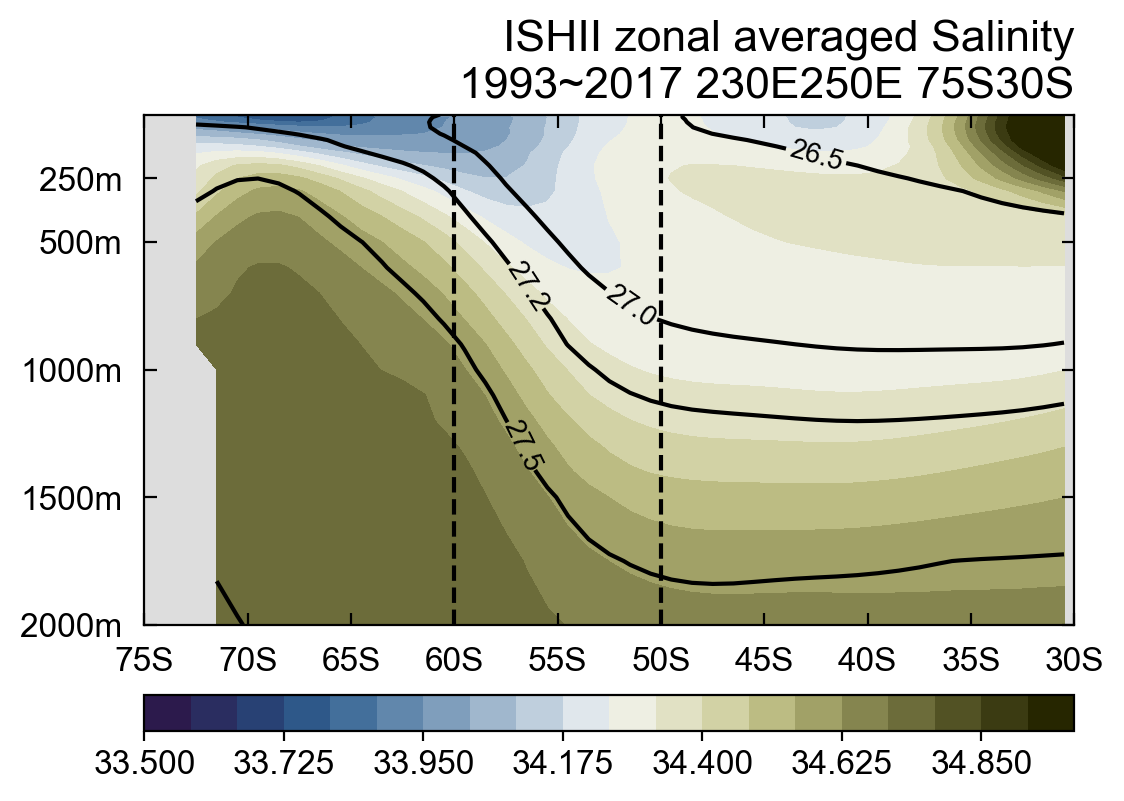

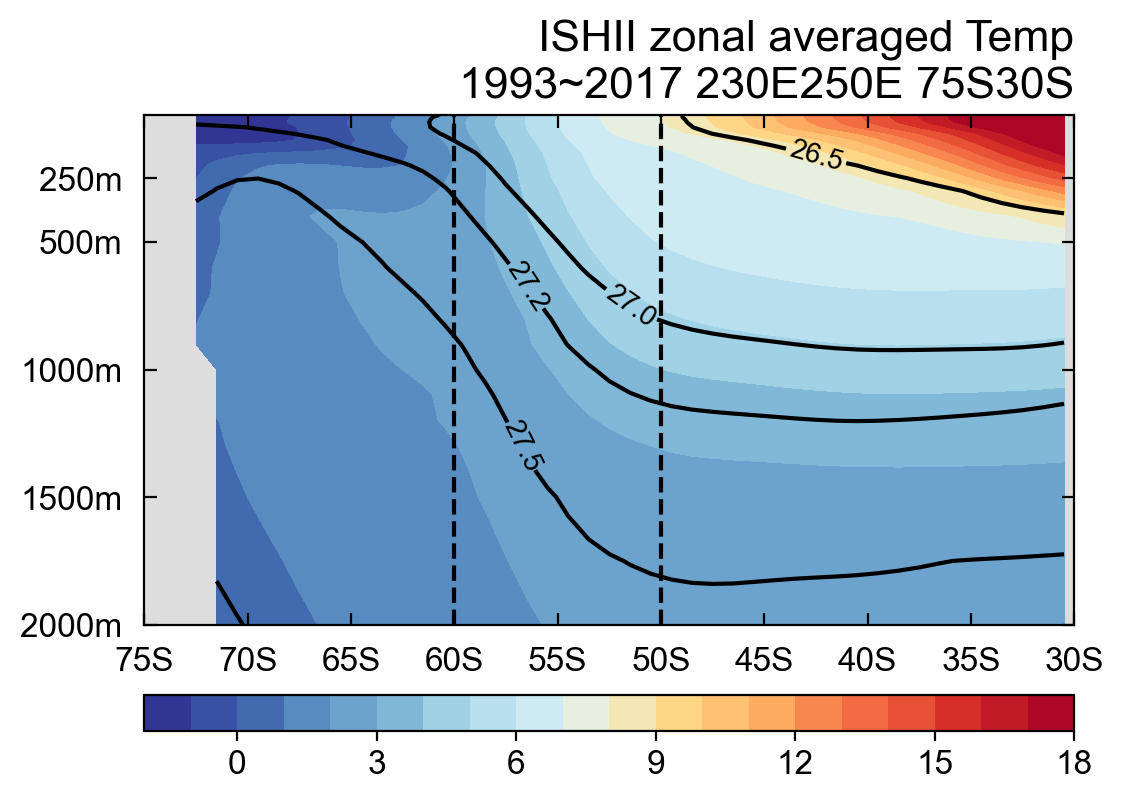

RuntimeError: No active exception to reraise

In [127]:
for i in [myDATA[-1]]: 
    print('!!! Open: '+i+' !!!')
    tmp=xr.open_dataset(i)

    mydata_ = tmp.loc[dict(lat=slice(lat_rng[0],lat_rng[-1]),lon=slice(lon_rng[0],lon_rng[-1]),\
        time=slice(time_rng[0],time_rng[-1]),depth=slice(depth_rng[0],depth_rng[-1]))]
    mydata=mydata_.mean(dim=['time','lon'])

    mydata=mydata.where(mydata<10**3)

    temp_,salt_=mydata['temp'],mydata['salt']

    latR,depthR=mydata.lat.values,mydata.depth
    time=mydata_.time.values

    CT=gsw_c.CT_from_pt(salt_,temp_) #CT = gsw_CT_from_pt(SA,pt)
    # rho = gsw_d.rho(salt_,CT,depthR)
    rho = gsw_d.sigma0(salt_,CT)

    # mydata[mydata>mylim[-1]]=mylim[-1]
    # mydata[mydata<mylim[0]]=mylim[0]
    salt_=salt_.values
    salt_[salt_>salt_lim[-1]]=salt_lim[-1]
    salt_[salt_<salt_lim[0]]=salt_lim[0]
    temp_=temp_.values
    temp_[temp_>temp_lim[-1]]=temp_lim[-1]
    temp_[temp_<temp_lim[0]]=temp_lim[0]
    

    dta_nm=i.split('/')[-1][2:-3].split('_')[0]+\
        ' zonal averaged QQQ'+'\n'+str(time[0])[:4]+'~'+str(time[-1])[:4]+' '+tmp_sv_nm.replace('_',' ')
        
    dta_snm=wpth_re+dta_nm.replace(' ','_').replace('\n','_').replace('~','_')

    latR_m,depthR_m=np.meshgrid(latR,depthR)
    
    # CMAP,mylevel=myClrbr('b2r',mylim,myN)
    CMAP_salt,mylevel_salt=myClrbr('salt',salt_lim,myN)
    CMAP_temp,mylevel_temp=myClrbr('b2r',temp_lim,myN)

    
    Vertical_data_drift03_(latR_m,-depthR_m,salt_,rho,mydepth,CMAP_salt,\
        mylevel_salt,mylevels2,dta_nm.replace('QQQ','Salinity'),dta_snm.replace('QQQ','Salt'))
    Vertical_data_drift03_(latR_m,-depthR_m,temp_,rho,mydepth,CMAP_temp,\
        mylevel_temp,mylevels2,dta_nm.replace('QQQ','Temp'),dta_snm.replace('QQQ','Temp'))

   

In [128]:
wpth_re

'C:/Users/shjo/OneDrive/mySO/Sections/Mean_states/salt_1993_2017_230E250E_75S30S/'